__Задача 1__

**Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.**

Из условий задачи известно, что $\overline X = 80, p = 0.95, n = 256, \sigma = 16$

Тогда используем $Z-$статистику для оценки математического ожидания $\mu$: $Z = \dfrac{\overline X - \mu}{\sigma / \sqrt{n}}$, при этом уровень значимости $\alpha = 0.05$

$H_0 -$ математическое ожидание равно $\mu$

$H_1 -$ математическое ожидание $\neq \mu$, то есть меньше или больше $\mu$

Критическая область вусторонняя: $\Omega_\alpha = \left( -\infty, t_{\alpha / 2}\right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$

Тогда для $Z-$статистики доверительный интервал есть:
$P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p$

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

p = 0.95
alpha = 1 - p
n = 256
mean = 80
sigma = 16

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

In [2]:
# confidence interval width
(mean + t2 * sigma / np.sqrt(n)) - (mean + t1 * sigma / np.sqrt(n)) 

3.9199279690801063

**Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:**
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
**Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.**

__Этапы проверки гипотез__

1. Формулируются нулевая и альтернативная гипотезы.
2. Задаётся некоторая __статистика__ (функция от выборки) $S(X)$, которая в условиях справедливости нулевой гипотезы $H_0$ имеет _известное распределение_ (в частности, известна её функция распределения $F_S(x) = P(S < x)$).
3. Фиксируется __уровень значимости__ $\alpha$ — допустимая для данной задачи вероятность _ошибки первого рода_ (чаще всего $0.01$, $0.05$ или $0.1$).
4. Определяется __критическая область__ $\Omega_\alpha$, такая, что $P(S \in \Omega_\alpha | H_0) = \alpha$.
5. Проводится __статистический тест__: для конкретной выборки $X$ считается значение $S(X)$, и если оно принадлежит $\Omega_\alpha$, то заключаем, что данные противоречат гипотезе $H_0$, и принимается гипотеза $H_1$.

Сформулируем гипотезы:

$H_0 -$ математическое ожидание для веса пачки печенья составляет 200гр.

$H_1 -$ математическое ожидание для веса пачки печенья отличается от 200гр.

Так как значения весов распределены нормально и нам неизвестна $\sigma$ генеральной совокупности, воспользуемя статистикой Стьюдента $t$:
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$
где $\sigma_X$ — несмещённая оценка среднего квадратического отклонения.

Условием задачи уровень значимости $\alpha$ установлен $0.01$

Установим критическую область: $\Omega_\alpha$, такую, что $P(S \in \Omega_\alpha | H_0) = \alpha$, которая здесь двухсторонняя

Для двухсторонней области $\Omega_\alpha = \left( -\infty, t_{\alpha / 2} \right) \cup \left( t_{1 - \alpha / 2} , \infty \right)$ нужна комбинация двух границ ($\alpha = $ $p-value$ на границе критической области): $$P = 2 \cdot \min (P_l, P_r)$$

In [3]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

In [4]:
# statistic
def statistic(samples: np.ndarray, mu: float) -> float:
    return (samples.mean() - mu) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [5]:
# quantiles
alpha = 0.01
n = samples.shape[0]
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-3.24983554401537, 3.2498355440153697)

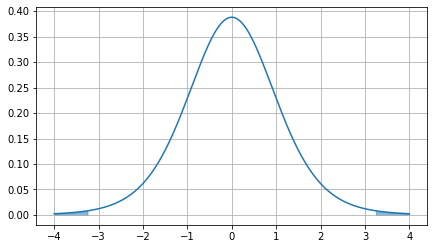

In [6]:
# critical areas
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.figure(figsize=(7,4))
plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.grid()
plt.show()

In [7]:
# test
S = statistic(samples, 200)
S

-1.0651074037450896

In [8]:
# p-value
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.31456660352472854

In [9]:
# same statistic and p-value
stats.ttest_1samp(samples, popmean=200)

Ttest_1sampResult(statistic=-1.0651074037450896, pvalue=0.31456660352472854)

Так как значение $p-value > \alpha$, то $H_0$ принимается, продавец прав

Далее варианты расчета мощности теста, к задаче 2 не относится

In [31]:
# set Cohen's d for 1-sampled test
effect_size_1samp = np.abs((samples.mean() - 200)) / samples.std(ddof=1)
effect_size_1samp

0.3368165348543039

In [43]:
from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import tt_solve_power

test = TTestPower()
# got very low test power, maybe it caused from small effect_size
test.power(effect_size=effect_size_1samp, nobs=n, alpha=alpha, df=n-1, alternative='two-sided')  

0.04574574015783043

In [50]:
# desired effect-size to achieve 80% test power
des = tt_solve_power(effect_size=None, nobs=n, alpha=alpha, power=0.8, alternative='two-sided')
des

1.3320310500014894

In [51]:
# if taking more significant difference in box weights
test.power(effect_size=des, nobs=n, alpha=alpha, df=n-1, alternative='two-sided')  

0.79999924671498

__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

$H_0$ - дисперсия случайной величины равна $0.0625$

$H_1$ - дисперсия отлична от $0.0625$



In [ ]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
alpha = 0.05
variance = 0.0625 
n = samples.shape[0]
Hs = (n - 1) * samples.var(ddof=1) / variance

t1 = stats.chi2.ppf(alpha/2, df=n-1)
t2 = stats.chi2.ppf(1 - alpha/2, df=n-1)
t1, t2, Hs

(11.688551922452438, 38.0756272503558, 28.720541753333343)

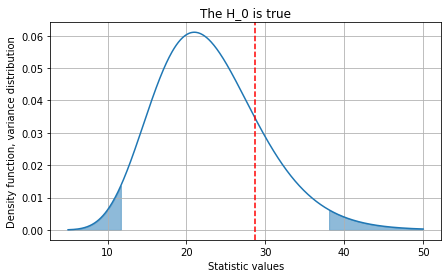

In [ ]:
# critical areas
ox = np.linspace(5, 50, 500)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(5, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 50, 100)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.figure(figsize=(7,4))
plt.plot(ox, oy)
plt.axvline(Hs, ls='--', lw=1.5, c='r')
hyp = 'The H_0 is true' if Hs < t2 and Hs > t1 else 'H_1 is true'
plt.title(hyp)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.xlabel('Statistic values')
plt.ylabel('Density function, variance distribution')
plt.grid()
plt.show()

In [ ]:
# p-value
p_left = stats.chi2.cdf(Hs, df=n - 1)
p_right = 1 - stats.chi2.cdf(Hs, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.37950875392024197

In [ ]:
# answer
1 if pvalue > alpha else 0

1

In [ ]:
# in addition
def var_test(x, va0, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    Q = (n - 1) * np.var(x, ddof=1) / va0 
    if direction == "lower":
        q = stats.chi2.ppf(alpha, n - 1)
        if Q <= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        q = stats.chi2.ppf(1 - alpha, n - 1)
        if Q >= q:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        q1 = stats.chi2.ppf(alpha / 2, n - 1)
        q2 = stats.chi2.ppf(1 - (alpha / 2), n - 1)
        if Q <= q1 or Q >= q2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
var_test(samples, variance)

'H_0 not rejected'